In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import random as rd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
genes = ['gene' + str(i) for i in range(1,101)]

wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]

data = pd.DataFrame(columns=[*wt, *ko], index = genes)
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    
data.head()


,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,302,322,322,298,329,653,650,636,664,608
gene2,328,344,336,363,375,299,265,274,297,231
gene3,786,783,722,740,725,504,498,499,511,496
gene4,231,219,238,215,266,831,806,818,825,848
gene5,295,275,299,306,285,834,831,883,862,835


In [4]:
#before PCA, need to centre and scale the data
#after centering, the average value for each gene will be 0, after scaling the standard deviation for each gene will be 1
scaled_data = preprocessing.scale(data.T)
scaled_data

array([[-1.07171901,  0.3851388 ,  1.26260765, -1.00796259, -0.98753481,
        -1.03463726, -0.85895673,  1.13596551,  1.01447868, -1.11118378,
        -0.71793924,  1.54405586,  1.08162235, -1.01562477, -0.95223707,
        -1.11571597,  0.94663838,  0.96004431,  1.10884146,  0.97069485,
        -1.09806202,  0.99337262, -0.93967695,  0.17307359, -0.97976949,
         1.46308552, -0.3979749 , -0.76115582,  1.33125778, -0.24420337,
         1.11739786, -0.92980895,  0.85598062, -0.98431611,  1.08427355,
        -1.12875186, -1.02493547, -0.98996735,  1.00761426, -1.04816577,
        -1.00046482,  0.60044101,  0.99926816,  0.95933224,  0.97431567,
         1.03787318,  0.8563591 ,  0.87930006,  1.0270573 ,  1.39516543,
         1.04744022,  1.02091237,  0.9986537 ,  0.92551491, -0.91043416,
        -0.97902174, -0.60231603,  0.96905552,  0.99565799, -1.03112223,
         0.59704403,  0.53227474,  0.77784841,  0.87232163, -0.09947246,
        -1.04170215,  1.05466583,  0.38661282, -1.7

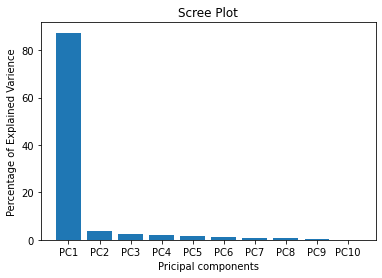

In [5]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca_data

percentage_variation = np.round(pca.explained_variance_ratio_ * 100,decimals=1)
labels = ['PC' + str(i) for i in range(1, len(percentage_variation)+1)]

plt.bar(x=range(1,len(percentage_variation)+1), height=percentage_variation, tick_label=labels)
plt.ylabel('Percentage of Explained Varience')
plt.xlabel('Pricipal components')
plt.title('Scree Plot')
plt.show()

In [6]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
#plt.scatter(pca_df.PC1, pca_df.PC2)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-9.493268,1.038194,0.535397,-0.177629,0.539952,1.433333,0.663579,-1.269008,-1.059866,1.123490e-15
wt2,-9.393351,-0.081343,-1.802490,-0.203700,0.712676,-0.739410,0.174726,-1.210863,1.241652,8.967128e-16
wt3,-9.019550,-1.413276,2.255078,2.869957,-0.964545,-0.088254,-0.730428,0.125700,0.269929,-2.797491e-16
wt4,-9.262026,-2.648742,-1.233298,-0.718122,0.535623,0.658058,0.840554,1.638682,-0.087122,9.695566e-16
wt5,-9.540296,2.875860,0.223093,-1.707990,-0.818849,-1.313426,-1.006394,0.698885,-0.397118,6.319388e-16
ko1,9.255888,-0.185877,1.574847,-0.164170,-0.163918,-1.550703,2.054333,-0.080093,-0.114103,1.445829e-16
ko2,9.820924,-2.584373,-1.475705,-0.758478,-2.184353,-0.016595,-0.755413,-0.705429,-0.463280,-1.758097e-18
ko3,8.682093,2.253023,0.623516,-0.624709,-1.131476,1.761937,0.252793,0.413963,0.978544,-5.127104e-16
ko4,9.563349,-1.232171,1.545861,-1.156202,2.520913,0.051921,-1.317204,-0.058699,0.062175,-2.982578e-16
ko5,9.386237,1.978706,-2.246298,2.641042,0.953976,-0.196861,-0.176547,0.446861,-0.430811,-1.200821e-16


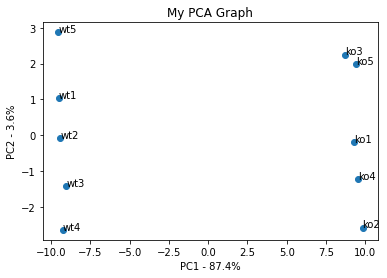

In [7]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(percentage_variation[0]))
plt.ylabel('PC2 - {0}%'.format(percentage_variation[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

In [8]:
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,302,322,322,298,329,653,650,636,664,608
gene2,328,344,336,363,375,299,265,274,297,231
gene3,786,783,722,740,725,504,498,499,511,496
gene4,231,219,238,215,266,831,806,818,825,848
gene5,295,275,299,306,285,834,831,883,862,835
...,...,...,...,...,...,...,...,...,...,...
gene96,571,581,574,570,554,99,98,95,94,70
gene97,536,517,525,485,503,261,253,262,240,247
gene98,511,480,500,468,478,958,1014,962,982,956
gene99,858,972,852,920,849,866,938,886,931,962


In [9]:
loading_score = pd.Series(pca.components_[0], index=genes)
sorted_loading_score = loading_score.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_score[0:10].index.values
print(loading_score[top_10_genes])

gene38    0.106942
gene43   -0.106925
gene6     0.106911
gene74    0.106892
gene56    0.106882
gene41    0.106871
gene25    0.106868
gene58   -0.106864
gene53   -0.106850
gene95   -0.106845
dtype: float64
